## Importing libraries

In [2]:
import numpy as np
import pandas as pd

## Loading Dataset

In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = ""

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "atomicd/retail-store-inventory-and-demand-forecasting",
  "sales_data.csv",
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

<ipython-input-3-1501638547>:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


# Analysis

In [11]:
df.head(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand
0,2022-01-01,S001,P0001,Electronics,North,195,102,252,72.72,5,Snowy,0,85.73,Winter,0,115
1,2022-01-01,S001,P0002,Clothing,North,117,117,249,80.16,15,Snowy,1,92.02,Winter,0,229
2,2022-01-01,S001,P0003,Clothing,North,247,114,612,62.94,10,Snowy,1,60.08,Winter,0,157
3,2022-01-01,S001,P0004,Electronics,North,139,45,102,87.63,10,Snowy,0,85.19,Winter,0,52
4,2022-01-01,S001,P0005,Groceries,North,152,65,271,54.41,0,Snowy,0,51.63,Winter,0,59


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [13]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand
count,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000
mean,301.062842,88.827316,89.090645,67.726028,9.087039,0.328947,69.454029,0.200000,104.317158
std,226.510161,43.994525,162.404627,39.377899,7.475781,0.469834,40.943818,0.400003,46.964801
min,0.000000,0.000000,0.000000,4.740000,0.000000,0.000000,4.290000,0.000000,4.000000
25%,136.000000,58.000000,0.000000,31.997500,5.000000,0.000000,32.620000,0.000000,71.000000
50%,227.000000,84.000000,0.000000,64.500000,10.000000,0.000000,65.700000,0.000000,100.000000
75%,408.000000,114.000000,121.000000,95.830000,10.000000,1.000000,97.932500,0.000000,133.000000
max,2267.000000,426.000000,1616.000000,228.030000,25.000000,1.000000,261.220000,1.000000,430.000000


## Handling Missing Values

In [16]:
df.isna().sum() # No nulls so we can move on

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Price,0
Discount,0


## Handling Duplicates

In [19]:
df[df.duplicated()] # No duplicates so we can move on

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Weather Condition,Promotion,Competitor Pricing,Seasonality,Epidemic,Demand


## Checking for Mixed Values

In [22]:
mixedColumns = []

for col in df.columns:
  types = df[col].map(type).nunique() # Counts unique types in the current column
  if types > 1: # If more than 1, appended to mixedColumns
    mixedColumns.append(col)
print(mixedColumns) # None so we can move on

[]


## Outlier Detection

In [23]:
# Look at:
# 1. High standard deviation may suggest extreme values or skewed distribution.
# 2. If max ≫ 75% or min ≪ 25%, possible outliers exist — check with IQR or boxplot.
# 3. A big gap between mean and median (50%) indicates data skew, possibly due to outliers.
# 4. Use .describe() to quickly identify which numeric columns are worth checking for outliers.

df.describe()

,Inventory Level,Units Sold,Units Ordered,Price,Discount,Promotion,Competitor Pricing,Epidemic,Demand
count,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000,76000.000000
mean,301.062842,88.827316,89.090645,67.726028,9.087039,0.328947,69.454029,0.200000,104.317158
std,226.510161,43.994525,162.404627,39.377899,7.475781,0.469834,40.943818,0.400003,46.964801
min,0.000000,0.000000,0.000000,4.740000,0.000000,0.000000,4.290000,0.000000,4.000000
25%,136.000000,58.000000,0.000000,31.997500,5.000000,0.000000,32.620000,0.000000,71.000000
50%,227.000000,84.000000,0.000000,64.500000,10.000000,0.000000,65.700000,0.000000,100.000000
75%,408.000000,114.000000,121.000000,95.830000,10.000000,1.000000,97.932500,0.000000,133.000000
max,2267.000000,426.000000,1616.000000,228.030000,25.000000,1.000000,261.220000,1.000000,430.000000


In [ ]:
# We can see std is especially high for Inventory Level and Units Ordered
# We can see the difference between 75% and max is especially high for Inventory Level, Units Sold, Units Ordered, Price, Competitor Pricing, and Demand
# We will use boxplots to check these cols

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

### Inventory Level

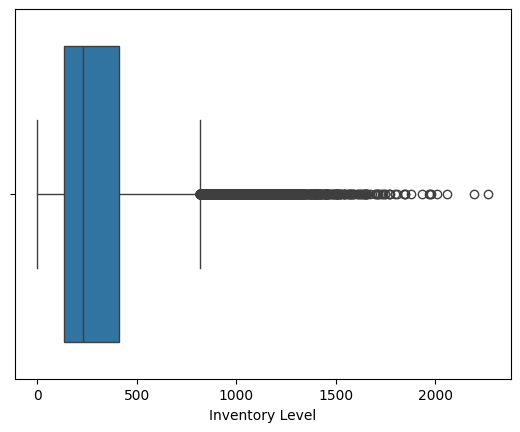

In [29]:
sns.boxplot(x=df['Inventory Level'])
plt.show()

In [31]:
# We can see an immense amount of outliers. Let's use IQR method

Q1 = df['Inventory Level'].quantile(0.25)
Q3 = df['Inventory Level'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Inventory Level'] >= Q1 - 1.5*IQR) & (df['Inventory Level'] <= Q3 + 1.5*IQR)]

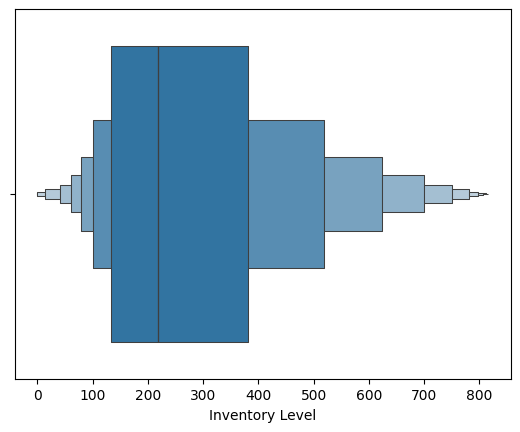

In [32]:
sns.boxenplot(x=df['Inventory Level'])
plt.show()

### Units Sold

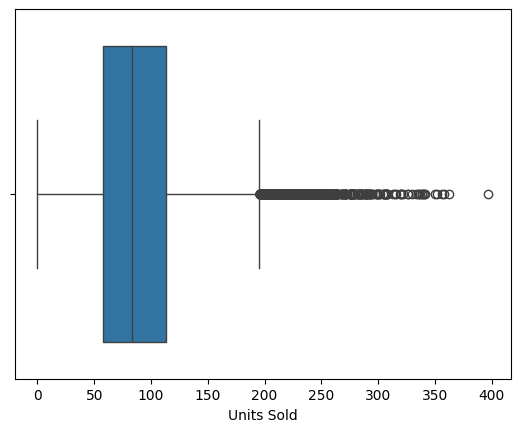

In [34]:
sns.boxplot(x=df['Units Sold'])
plt.show()

In [36]:
# Same thing as before. Let's use IQR Method

Q1 = df['Units Sold'].quantile(0.25)
Q3 = df['Units Sold'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Units Sold'] >= Q1 - 1.5*IQR) & (df['Units Sold'] <= Q3 + 1.5*IQR)]

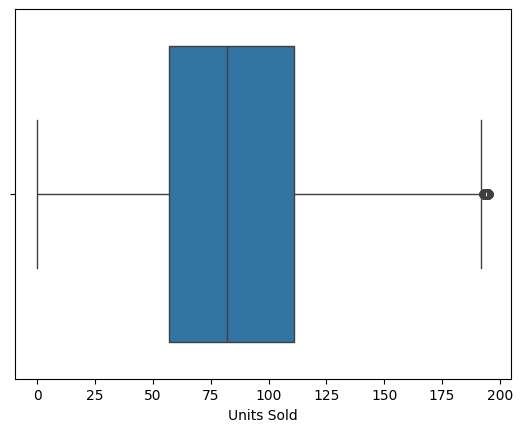

In [37]:
sns.boxplot(x=df['Units Sold'])
plt.show()

### Units Ordered

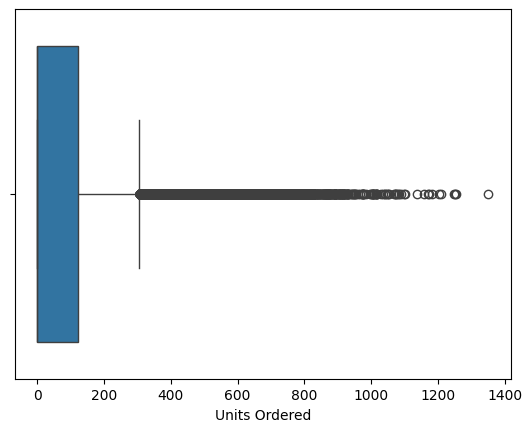

In [38]:
sns.boxplot(x=df['Units Ordered'])
plt.show()

In [39]:
Q1 = df['Units Ordered'].quantile(0.25)
Q3 = df['Units Ordered'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Units Ordered'] >= Q1 - 1.5*IQR) & (df['Units Ordered'] <= Q3 + 1.5*IQR)]

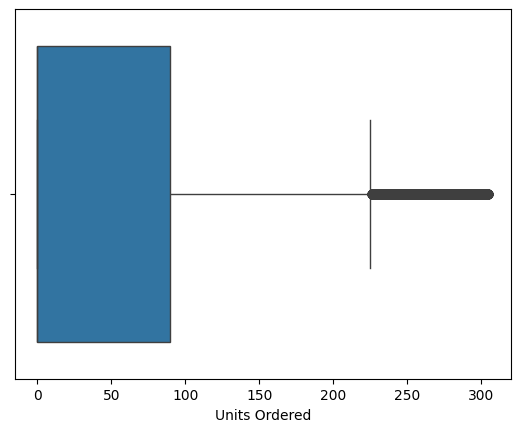

In [40]:
sns.boxplot(x=df['Units Ordered'])
plt.show()

### Price

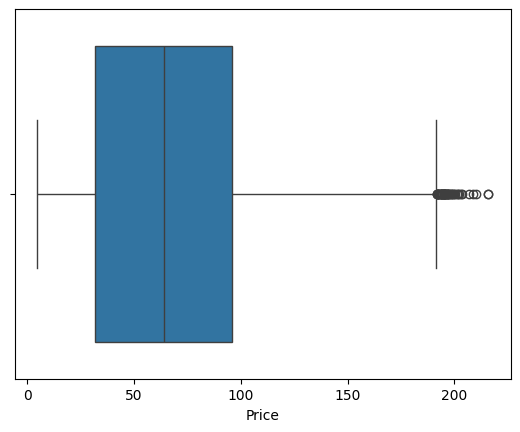

In [43]:
sns.boxplot(x=df['Price'])
plt.show()

In [44]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Price'] >= Q1 - 1.5*IQR) & (df['Price'] <= Q3 + 1.5*IQR)]

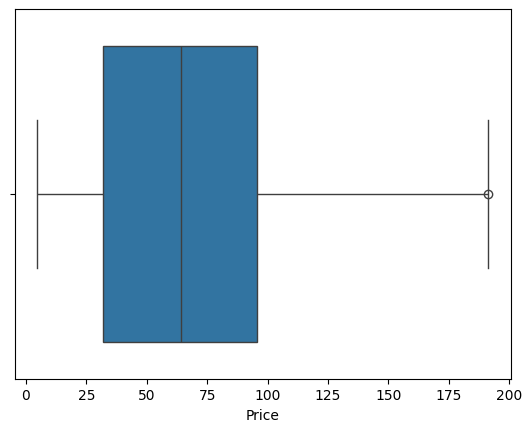

In [45]:
sns.boxplot(x=df['Price'])
plt.show()

### Competitor Pricing

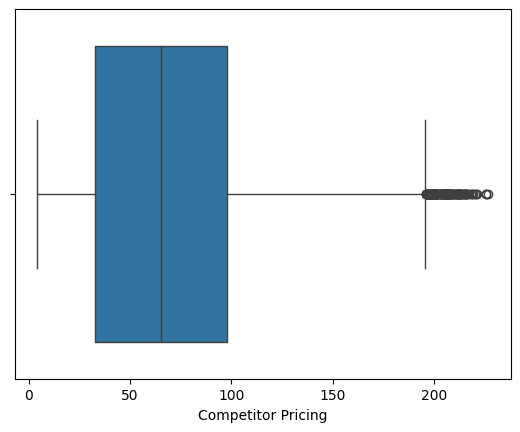

In [47]:
sns.boxplot(x=df['Competitor Pricing'])
plt.show()

In [48]:
Q1 = df['Competitor Pricing'].quantile(0.25)
Q3 = df['Competitor Pricing'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Competitor Pricing'] >= Q1 - 1.5*IQR) & (df['Competitor Pricing'] <= Q3 + 1.5*IQR)]

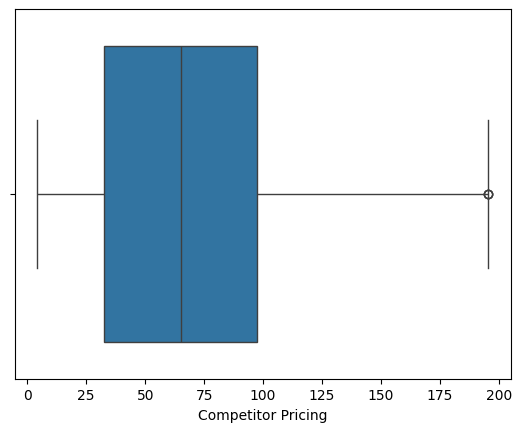

In [50]:
sns.boxplot(x=df['Competitor Pricing'])
plt.show()

### Demand

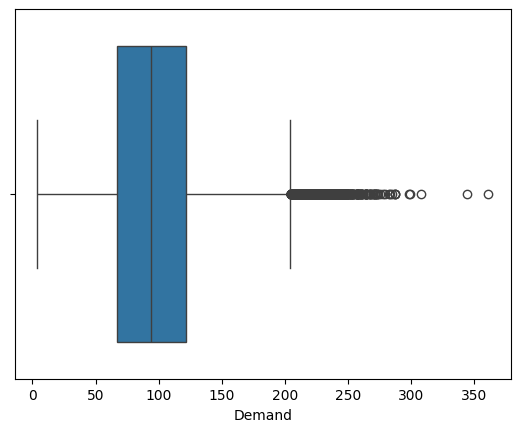

In [51]:
sns.boxplot(x=df['Demand'])
plt.show()

In [52]:
Q1 = df['Demand'].quantile(0.25)
Q3 = df['Demand'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Demand'] >= Q1 - 1.5*IQR) & (df['Demand'] <= Q3 + 1.5*IQR)]

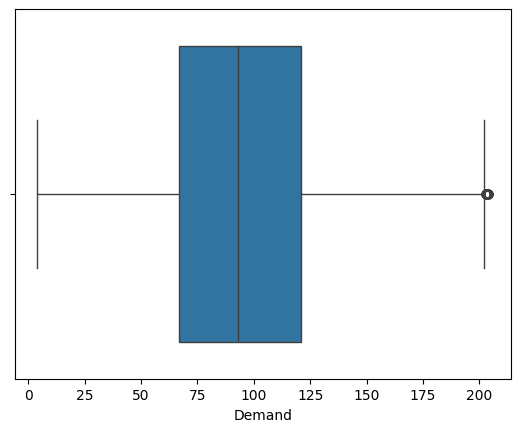

In [53]:
sns.boxplot(x=df['Demand'])
plt.show()

## Fix String Inconsistencies

In [54]:
for col in df.columns:
  print(col, df[col].unique()) # Looks good so we can move on

Date ['2022-01-01' '2022-01-02' '2022-01-03' '2022-01-04' '2022-01-05'
 '2022-01-06' '2022-01-07' '2022-01-08' '2022-01-09' '2022-01-10'
 '2022-01-11' '2022-01-12' '2022-01-13' '2022-01-14' '2022-01-15'
 '2022-01-16' '2022-01-17' '2022-01-18' '2022-01-19' '2022-01-20'
 '2022-01-21' '2022-01-22' '2022-01-23' '2022-01-24' '2022-01-25'
 '2022-01-26' '2022-01-27' '2022-01-28' '2022-01-29' '2022-01-30'
 '2022-01-31' '2022-02-01' '2022-02-02' '2022-02-03' '2022-02-04'
 '2022-02-05' '2022-02-06' '2022-02-07' '2022-02-08' '2022-02-09'
 '2022-02-10' '2022-02-11' '2022-02-12' '2022-02-13' '2022-02-14'
 '2022-02-15' '2022-02-16' '2022-02-17' '2022-02-18' '2022-02-19'
 '2022-02-20' '2022-02-21' '2022-02-22' '2022-02-23' '2022-02-24'
 '2022-02-25' '2022-02-26' '2022-02-27' '2022-02-28' '2022-03-01'
 '2022-03-02' '2022-03-03' '2022-03-04' '2022-03-05' '2022-03-06'
 '2022-03-07' '2022-03-08' '2022-03-09' '2022-03-10' '2022-03-11'
 '2022-03-12' '2022-03-13' '2022-03-14' '2022-03-15' '2022-03-16'
 '202

# ML Model Development

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [5]:
# Setting up X and y
target='Demand'
X = df.drop(columns=[target])
y = df[target]

## Visualizing Relationships

In [6]:
pip install phik

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix

interval columns not set, guessing: ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount', 'Promotion', 'Competitor Pricing', 'Epidemic', 'Demand']


<Axes: >

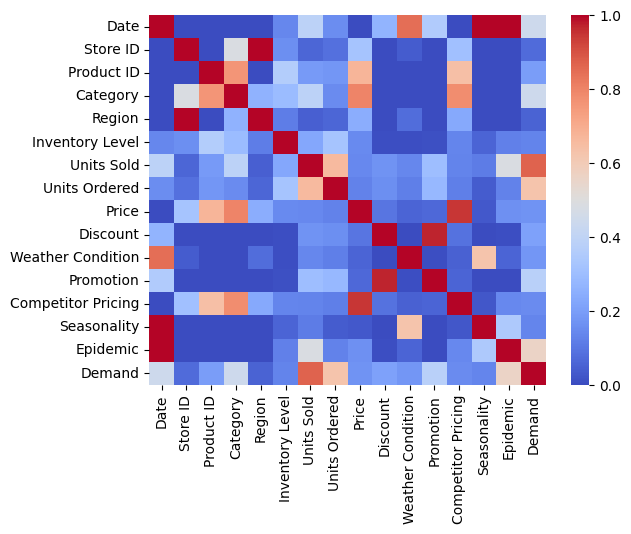

In [8]:
phik_corr = df.phik_matrix()
sns.heatmap(phik_corr, cmap="coolwarm", annot=False)

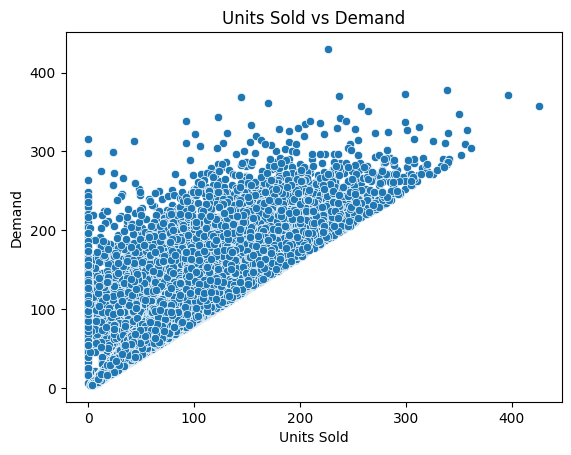

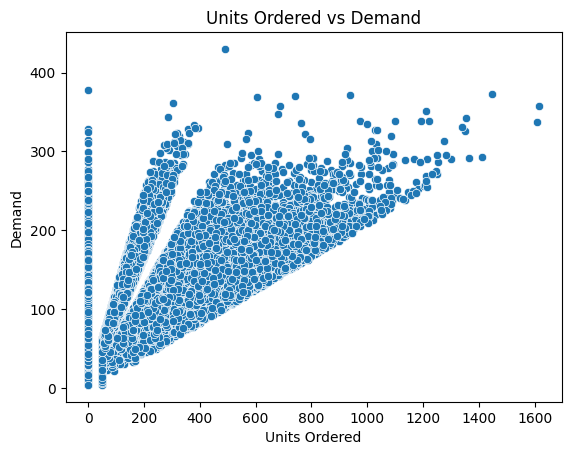

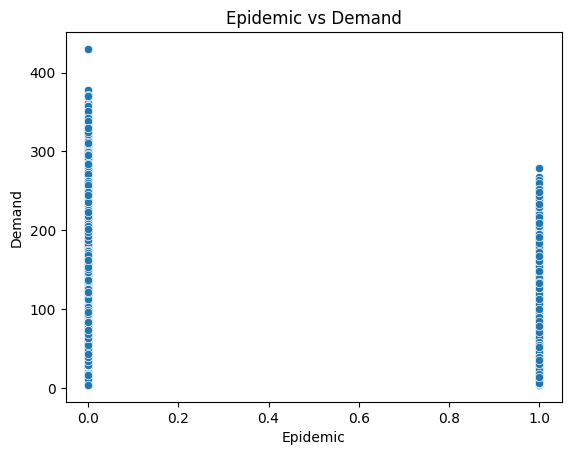

In [9]:
top_features = phik_corr[target].abs().sort_values(ascending=False).index[1:4]

for col in top_features:
    sns.scatterplot(data=df, x=col, y=target)
    plt.title(f"{col} vs {target}")
    plt.show()


### Preprocessing Categorical and Numeric Features

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate features
numeric_features = X.select_dtypes(include='number').columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values
    ('scaler', StandardScaler())                  # Optional, but good for consistent scale
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))       # Avoid dummy trap
])

# Combine into column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

### Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Building Model

In [12]:
from sklearn.linear_model import LinearRegression

# Full pipeline: preprocessing + model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Inventory Level',
                                                   'Units Sold',
                                                   'Units Ordered', 'Price',
                                                   'Discount', 'Promotion',
                                                   'Competitor Pricing',
                                                   'Epidemic']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Date', 'Store ID',
                                                   'Product ID', 'Category',
                                                   'Region',
                                                   'Weather Condition',
                                                   'Seasonality'])])),
                ('regressor', LinearRegression())])

### Evaluating Model

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² score:", r2_score(y_test, y_pred))

MAE: 16.33544026432768
RMSE: 21.911635142377715
R² score: 0.7826052390349358


### Interpreting Coefficient

In [14]:
# Get feature names after encoding
encoded_columns = model.named_steps['preprocessor'].get_feature_names_out()
coefs = model.named_steps['regressor'].coef_

# Combine into a readable table
importance = pd.DataFrame({
    'feature': encoded_columns,
    'coefficient': coefs
})
importance['abs_coef'] = importance['coefficient'].abs()
importance.sort_values(by='abs_coef', ascending=False, inplace=True)
importance.drop(columns='abs_coef', inplace=True)

print(importance.head(10))

                     feature  coefficient
9       cat__Date_2022-01-03    33.374458
1            num__Units Sold    28.649563
791  cat__Category_Furniture   -27.276008
10      cat__Date_2022-01-04    21.773977
382     cat__Date_2023-01-11    15.787956
51      cat__Date_2022-02-14    14.753578
392     cat__Date_2023-01-21    14.017952
64      cat__Date_2022-02-27    13.552202
23      cat__Date_2022-01-17    13.102890
25      cat__Date_2022-01-19    12.678923
